In [1]:
import random
import torch.nn as nn

random.seed(2022)

from hydranet.data import *
from hydranet.models import HydraNet
from hydranet.trainer import Trainer

## Training a depth predictor

In [2]:
train_ds, valid_ds = NYUDataset.from_npy(size=192, tfms=RandomAugment(crop_size=(128,170))).split(pct=0.2)

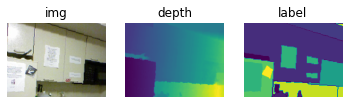

In [3]:
train_ds.show_one()

In [4]:
train_dl = train_ds.dataloader(batch_size=32, num_workers=8, shuffle=True)
valid_dl = valid_ds.dataloader(batch_size=64, num_workers=8, shuffle=False)

In [5]:
loss_func = nn.MSELoss()

In [6]:
model = HydraNet(num_classes=1)

trainer = Trainer(train_dl, model, loss_func, valid_dl=valid_dl, fp16=True, log=True)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tcapelle (use `wandb login --relogin` to force relogin)


In [ ]:
trainer.fit_one_cyle(10, 1e-7, 1e-4, weight_decay=1e-2)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

0it [00:00, ?it/s]

i=0, train_loss=12.196831, val_loss=9.823979


  0%|          | 0/37 [00:00<?, ?it/s]

0it [00:00, ?it/s]

i=1, train_loss=2.561999, val_loss=1.492044


  0%|          | 0/37 [00:00<?, ?it/s]

0it [00:00, ?it/s]

i=2, train_loss=0.804565, val_loss=0.936067


  0%|          | 0/37 [00:00<?, ?it/s]

0it [00:00, ?it/s]

i=3, train_loss=1.939054, val_loss=1.747258


  0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
trainer.show_results()